# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 11: Data Cleaning Level Ⅲ – missing values, outliers, and errors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Missing values
## Detecting missing values
## Example of detecting missing values

In [2]:
pd.read_excel('tablewMV.xlsx')

,Gender,Height,Year,GPA,Personality Type
0,1,190.0,Sophomore,NaN,ISTJ
1,1,189.0,Freshman,3.81,ESNJ
2,0,160.0,Freshman,NaN,ISTJ
3,1,181.0,Sophomore,3.95,INTP
4,1,NaN,Freshman,3.62,ISTJ
5,0,184.0,Freshman,3.87,NaN
6,0,172.0,Junior,3.31,ISTP


In [3]:
air_df = pd.read_csv('Airdata.csv')
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43
...,...,...,...,...,...,...,...,...
8779,12/31/2020 19:00,4.920528,72,4.553679,251.565060,53.44,32.65,66.82
8780,12/31/2020 20:00,4.990529,74,3.259938,186.340200,49.80,34.03,67.31
8781,12/31/2020 21:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33
8782,12/31/2020 22:00,3.820529,88,8.435069,219.805570,39.88,19.90,43.70


In [4]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB


In [5]:
print('Number of missing values:')
for col in air_df.columns:
    n_MV = sum(air_df[col].isna())
    print('{}:{}'.format(col,n_MV))

Number of missing values:
DateTime:0
Temperature:0
Humidity:0
Wind_Speed:0
Wind_Direction:0
NO2_Location_A:120
NO2_Location_B:580
NO2_Location_C:132


## Causes of missing values
## Types of missing values
## Diagnosis of missing values
### Diagnosing the missing values in NO2_Location_A
#### Diagnosing the missing values based on Temperature

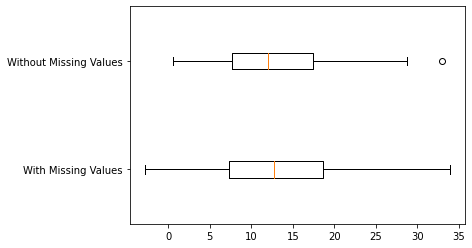

In [6]:
BM_MV = air_df.NO2_Location_A.isna()
MV_labels = ['With Missing Values','Without Missing Values']

box_sr = pd.Series('',index = BM_MV.unique())

for poss in BM_MV.unique():
    BM = BM_MV == poss
    box_sr[poss] = air_df[BM].Temperature
    
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)
plt.show()

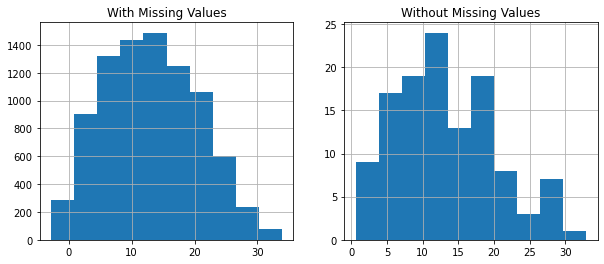

In [7]:
BM_MV = air_df.NO2_Location_A.isna()
temp_range = (air_df.Temperature.min(),air_df.Temperature.max())
MV_labels = ['With Missing Values','Without Missing Values']

plt.figure(figsize=(10,4))

for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    air_df[BM].Temperature.hist()
    plt.xlim = temp_range
    plt.title(MV_labels[i])

plt.show()

In [8]:
from scipy.stats import ttest_ind
BM_MV = air_df.NO2_Location_A.isna()
ttest_ind(air_df[BM_MV].Temperature, air_df[~BM_MV].Temperature)

Ttest_indResult(statistic=0.05646499065315542, pvalue=0.9549726689684548)

In [9]:
ttest_ind(air_df[BM_MV].Temperature, air_df[~BM_MV].Temperature).pvalue

0.9549726689684548

#### Diagnosing the missing values based on all the numerical attributes 

In [10]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}
    
    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())    
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])
   
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()
    
    plt.figure(figsize=(10,4))
    
    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()
    
    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()
    
    p_value = ttest_ind(group_1_data,group_2_data).pvalue
    
    print('p-value of t-test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Temperature:


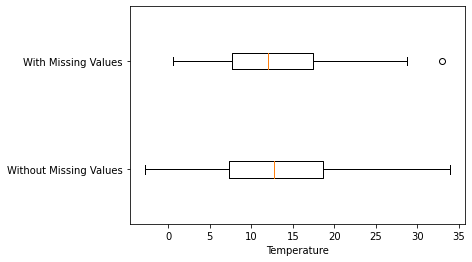

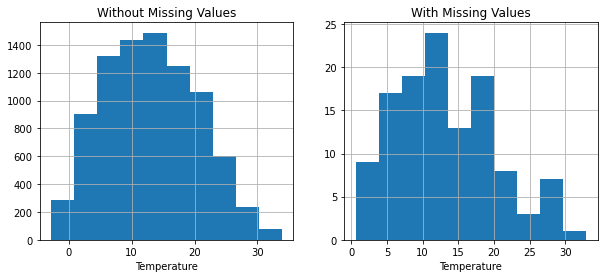

p-value of t-test: 0.9549726689684548
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


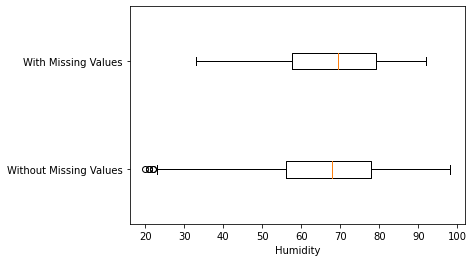

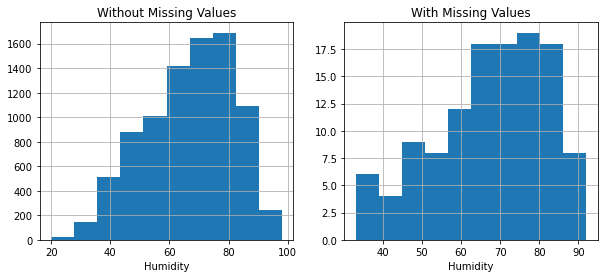

p-value of t-test: 0.5593319830352679
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


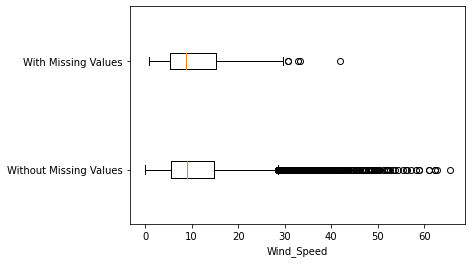

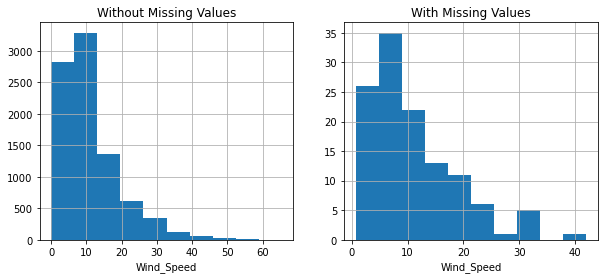

p-value of t-test: 0.8172472856083665
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


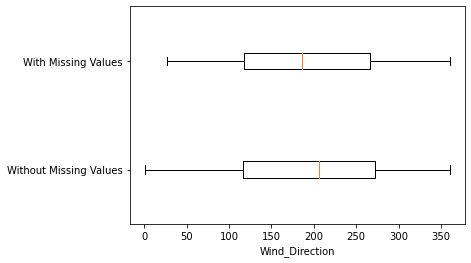

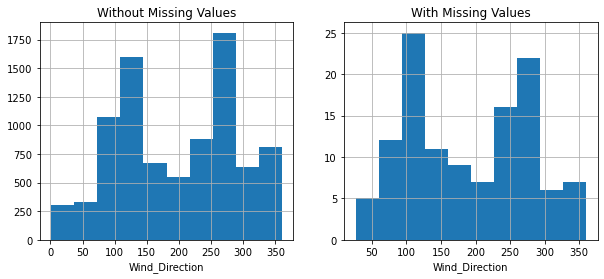

p-value of t-test: 0.39869195396670865
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [11]:
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = air_df.NO2_Location_A.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

#### Diagnosing the missing values based on weekday

In [12]:
air_df.DateTime = pd.to_datetime(air_df.DateTime)
air_df['month'] = air_df.DateTime.dt.month
air_df['day'] = air_df.DateTime.dt.day
air_df['hour'] = air_df.DateTime.dt.hour
air_df['weekday'] = air_df.DateTime.dt.day_name()

In [13]:
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553679,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259938,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820529,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


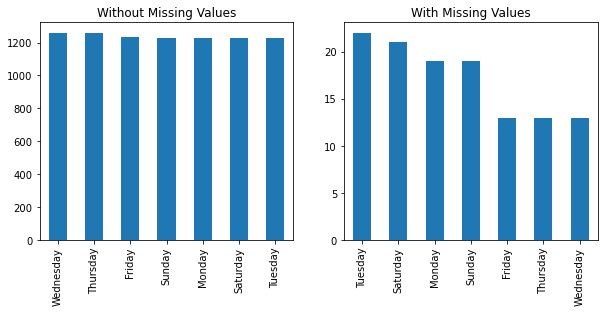

In [14]:
BM_MV = air_df.NO2_Location_A.isna()
MV_labels = ['Without Missing Values','With Missing Values']

plt.figure(figsize=(10,4))
for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    air_df[BM].weekday.value_counts().plot.bar()
    plt.title(MV_labels[i])
plt.show()

In [15]:
from scipy.stats import chi2_contingency
BM_MV = air_df.NO2_Location_A.isna()
contigency_table = pd.crosstab(BM_MV,air_df.weekday)
contigency_table

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
NO2_Location_A,,,,,,,
False,1235,1229,1227,1229,1259,1226,1259
True,13,19,21,19,13,22,13


In [16]:
chi2_contingency(contigency_table)

(6.048964133655503,
 0.41772751510388023,
 6,
 array([[1230.95081967, 1230.95081967, 1230.95081967, 1230.95081967,
         1254.62295082, 1230.95081967, 1254.62295082],
        [  17.04918033,   17.04918033,   17.04918033,   17.04918033,
           17.37704918,   17.04918033,   17.37704918]]))

#### Diagnosing the missing values based on all the categorical attributes 

In [17]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])   
    p_value = chi2_contingency(contigency_table)[1]
    
    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for month:


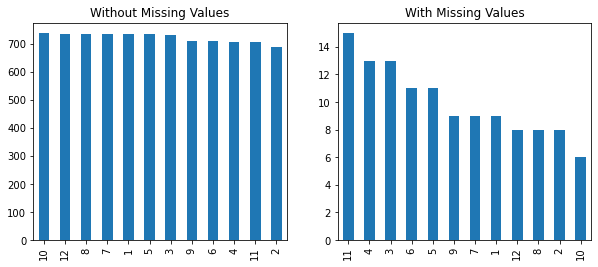

p-value of Chi_squared test: 0.7096565832929861
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


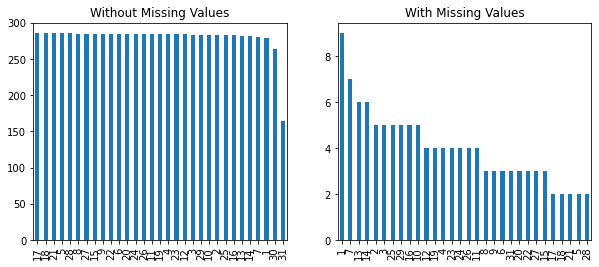

p-value of Chi_squared test: 0.8040640724986007
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


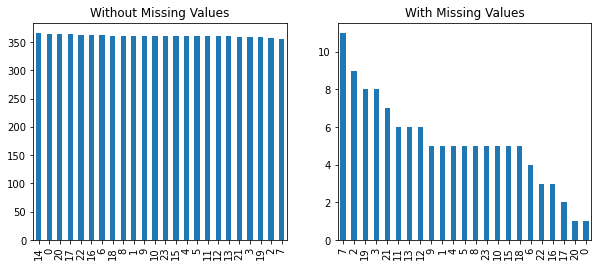

p-value of Chi_squared test: 0.12725321642668141
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


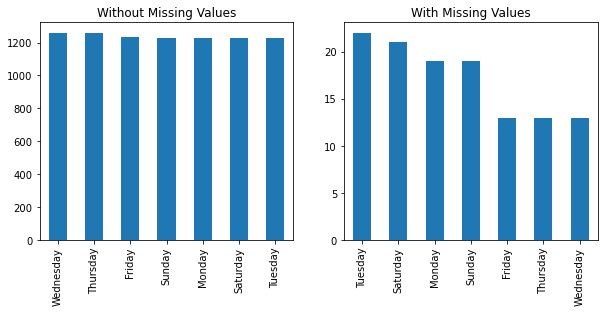

p-value of Chi_squared test: 0.41772751510388023
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [18]:
categorical_attributes = ['month', 'day','hour', 'weekday']

BM_MV = air_df.NO2_Location_A.isna()
for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

### Diagnosing the missing values in NO2_Location_B

Diagnosis Analysis of Missing Values for Temperature:


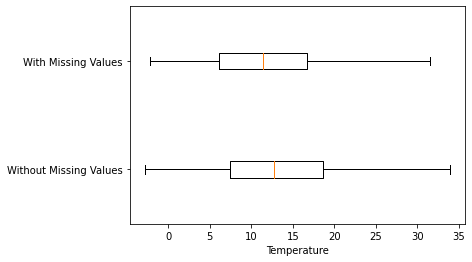

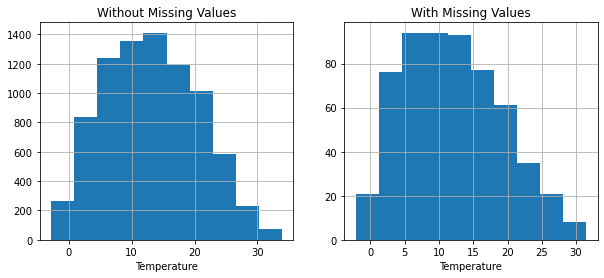

p-value of t-test: 0.00018958810621204082
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Humidity:


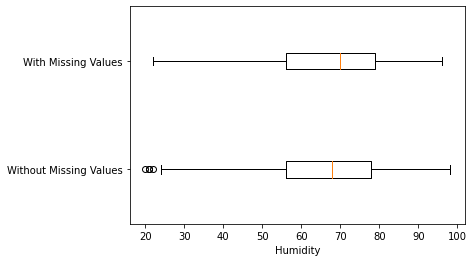

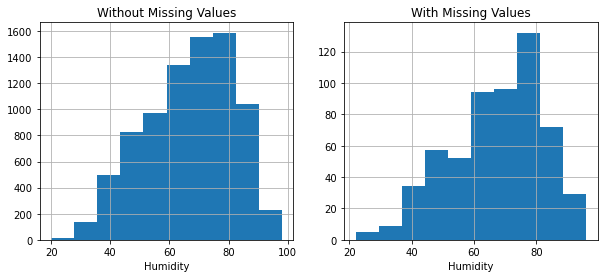

p-value of t-test: 0.43891454332709945
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Speed:


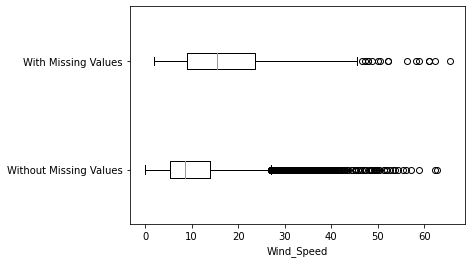

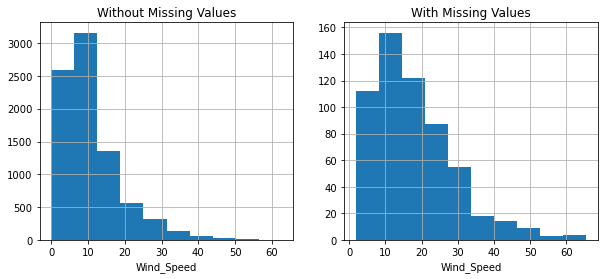

p-value of t-test: 1.3126894108159327e-85
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Wind_Direction:


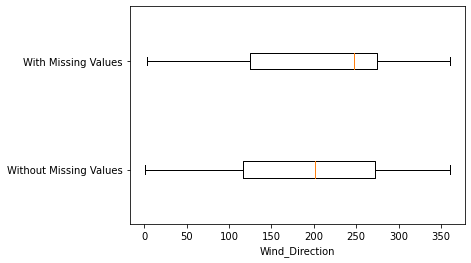

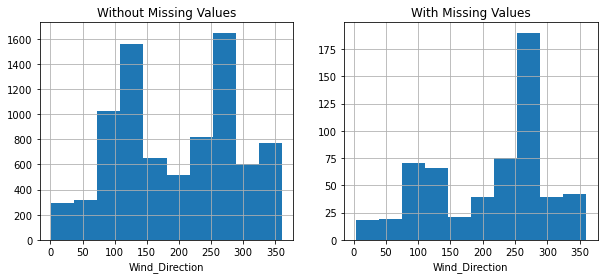

p-value of t-test: 5.8398056632254833e-05
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for month:


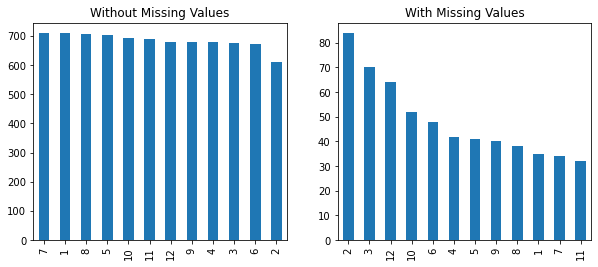

p-value of Chi_squared test: 1.8048364819875927e-10
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for day:


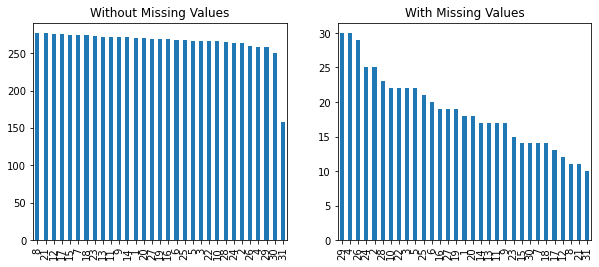

p-value of Chi_squared test: 0.034816691411564224
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for hour:


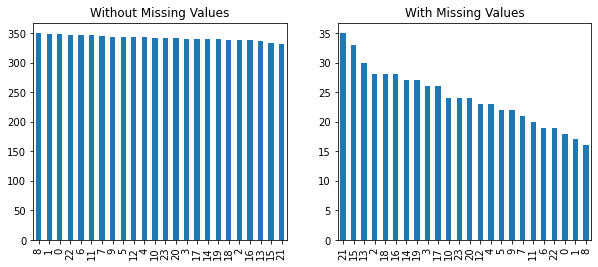

p-value of Chi_squared test: 0.3949474320151337
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for weekday:


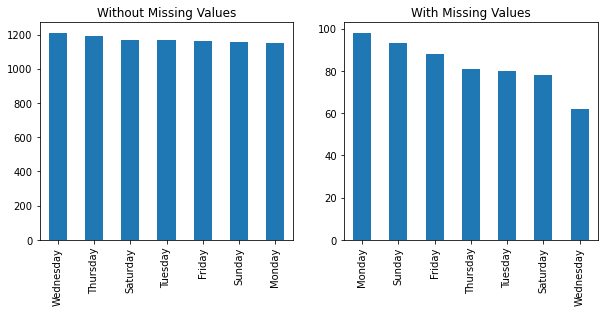

p-value of Chi_squared test: 0.07073083108612685
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [19]:
categorical_attributes = ['month', 'day','hour', 'weekday']
numerical_attributes = ['Temperature', 'Humidity', 'Wind_Speed', 'Wind_Direction']

BM_MV = air_df.NO2_Location_B.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

for att in categorical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

### Diagnosing the missing values in NO2_Location_C

Diagnosis Analysis for Temperature:


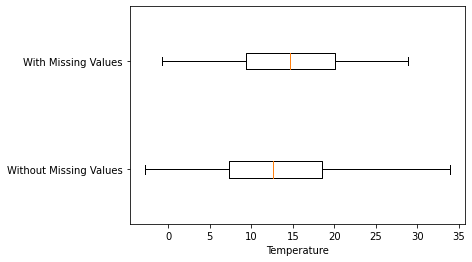

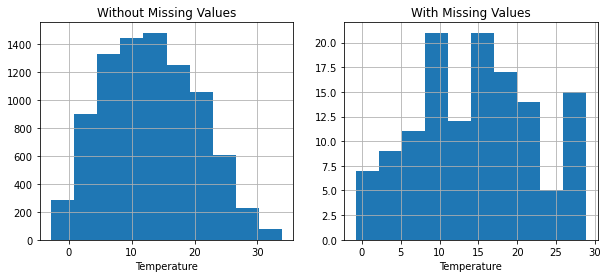

p-value of t-test: 0.01981913552818646
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for Humidity:


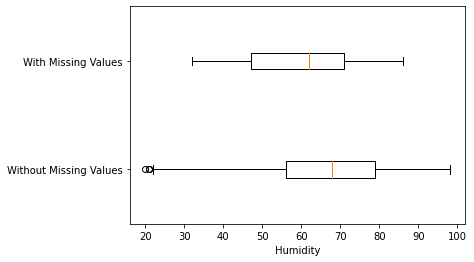

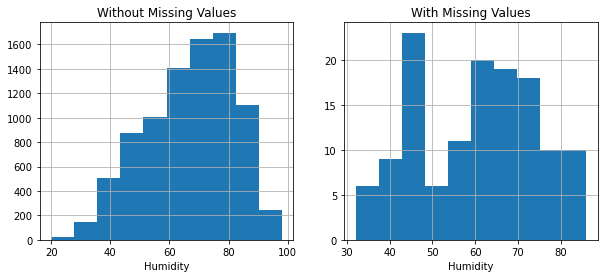

p-value of t-test: 8.179400599849167e-07
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for Wind_Speed:


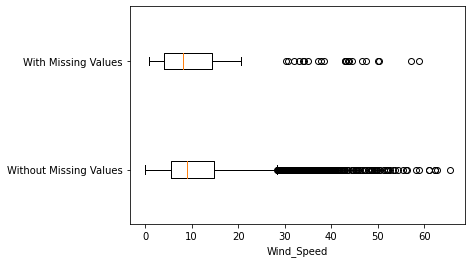

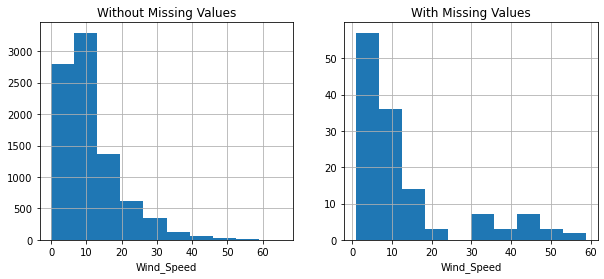

p-value of t-test: 0.01359796253829262
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for Wind_Direction:


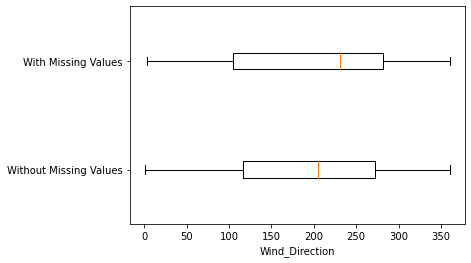

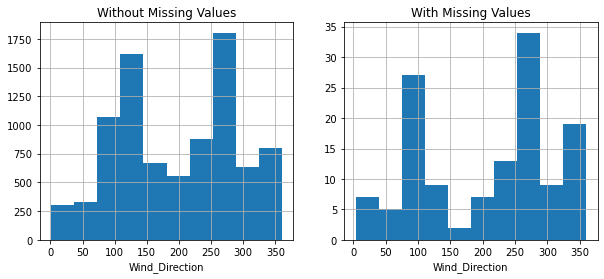

p-value of t-test: 0.3083081973623661
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for month:


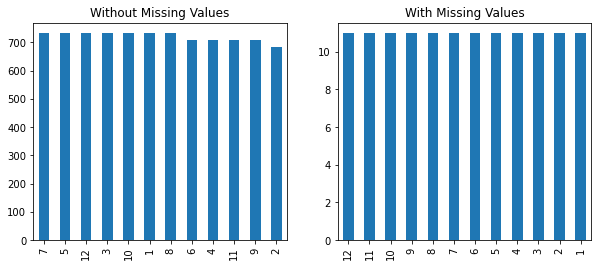

p-value of Chi_squared test: 0.9999999999839941
- - - - - - - - - divider - - - - - - - - - 
Diagnosis Analysis for day:


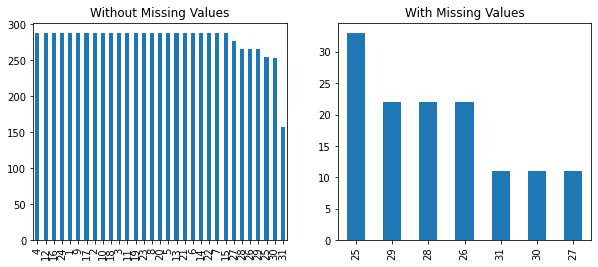

p-value of Chi_squared test: 4.5607973056357013e-101
- - - - - - - - - divider - - - - - - - - - 
Diagnosis Analysis for hour:


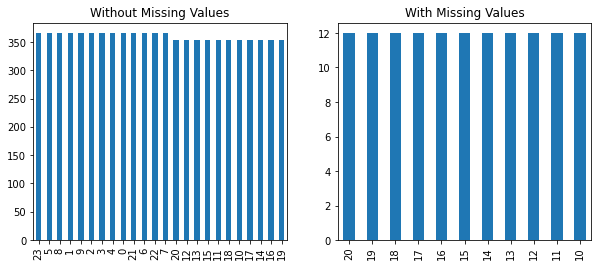

p-value of Chi_squared test: 3.3850851028854862e-22
- - - - - - - - - divider - - - - - - - - - 
Diagnosis Analysis for weekday:


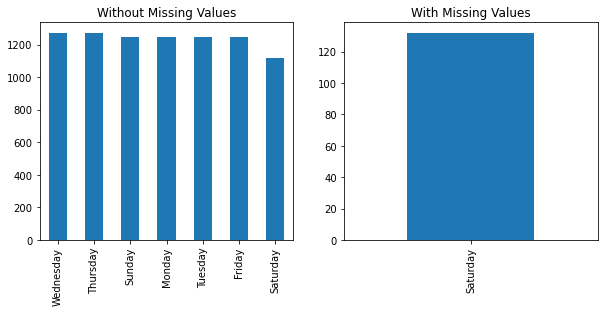

p-value of Chi_squared test: 1.554165460861991e-171
- - - - - - - - - divider - - - - - - - - - 


In [20]:
categorical_attributes = ['month', 'day','hour', 'weekday']
numerical_attributes = ['Temperature', 'Humidity',
                        'Wind_Speed', 'Wind_Direction']
BM_MV = air_df.NO2_Location_C.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(air_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(air_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

## Dealing with missing values
### First Approach: Keep the missing value as is
### Second Approach: Remove data objects with missing values
### Third Approach: Remove the attributes with missing values
### Fourth Approach: Estimate and impute the missing values
### Choosing the right approach in dealing with missing values
### Example 1 

In [21]:
air_df

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,month,day,hour,weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:00:00,4.920528,72,4.553679,251.565060,53.44,32.65,66.82,12,31,19,Thursday
8780,2020-12-31 20:00:00,4.990529,74,3.259938,186.340200,49.80,34.03,67.31,12,31,20,Thursday
8781,2020-12-31 21:00:00,4.360529,84,10.587917,252.181120,43.32,25.55,59.33,12,31,21,Thursday
8782,2020-12-31 22:00:00,3.820529,88,8.435069,219.805570,39.88,19.90,43.70,12,31,22,Thursday


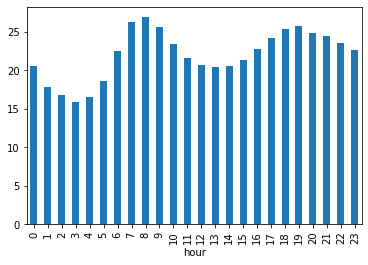

In [22]:
air_df.groupby('hour').NO2_Location_A.mean().plot.bar()
plt.show()

### Example 2 

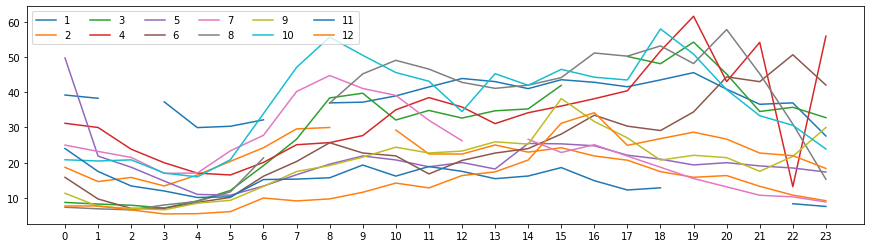

In [23]:
month_poss = air_df.month.unique()
hour_poss = air_df.hour.unique()
plt.figure(figsize=(15,4))

for mn in month_poss:
    BM = (air_df.month == mn) & (air_df.day ==1)
    wdf = air_df[BM]
    plt.plot(wdf.NO2_Location_A.values,
             label=mn)
plt.legend(ncol=6)
plt.xticks(hour_poss)
plt.show()

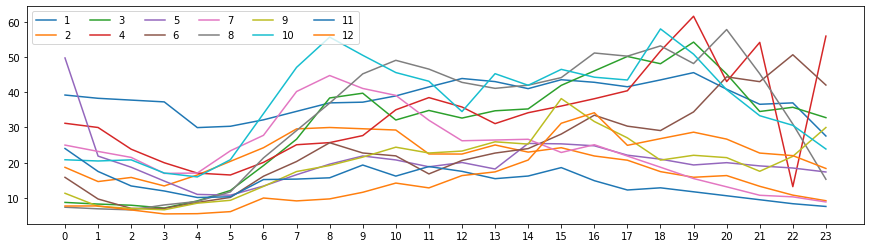

In [24]:
NO2_Location_A_noMV = air_df.NO2_Location_A.interpolate(method='linear')

month_poss = air_df.month.unique()
hour_poss = air_df.hour.unique()
plt.figure(figsize=(15,4))

for mn in month_poss:
    BM = (air_df.month == mn) & (air_df.day ==1)
    plt.plot(NO2_Location_A_noMV[BM].values,
             label=mn)
plt.legend(ncol=6)
plt.xticks(hour_poss)
plt.show()

### Example 3

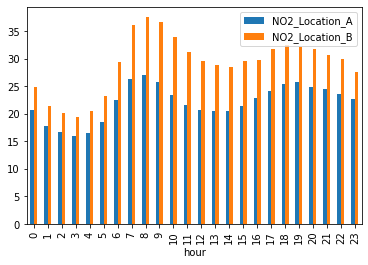

In [25]:
air_df.groupby('hour')[
    ['NO2_Location_A','NO2_Location_B']].mean().plot.bar()
plt.show()

### Example 4

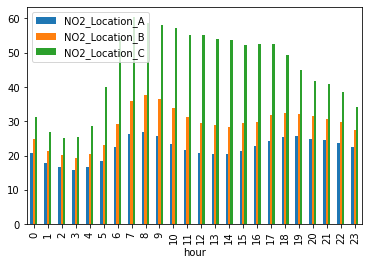

In [26]:
air_df.groupby('hour')[['NO2_Location_A','NO2_Location_B','NO2_Location_C']].mean().plot.bar()
plt.show()

### Example 5

In [27]:
patient_df = pd.read_csv('kidney_disease.csv')

In [28]:
print('Number of missing values:')
for col in patient_df.columns:
    n_MV = sum(patient_df[col].isna())
    print('{}:{}'.format(col,n_MV))

Number of missing values:
rc:131
sc:17
pcv:71
sg:47
hemo:52
diagnosis:0


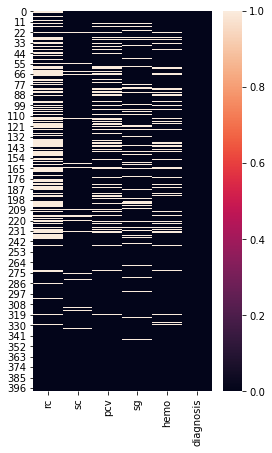

In [29]:
patient_df = pd.read_csv('kidney_disease.csv')
plt.figure(figsize=(4,7))
sns.heatmap(patient_df.isna())
plt.show()

Diagnosis Analysis for sc:


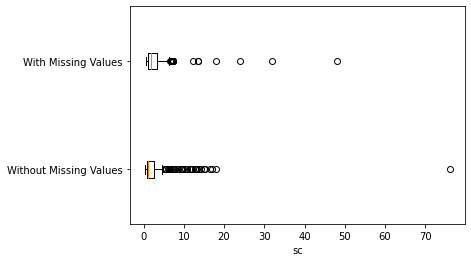

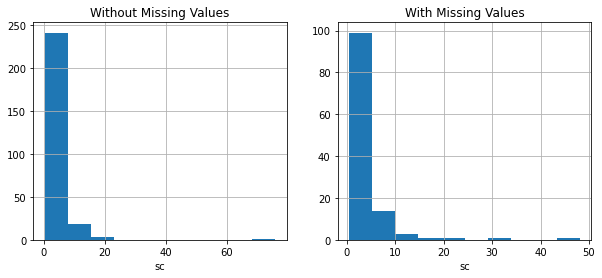

p-value of t-test: 0.18583257224831443
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


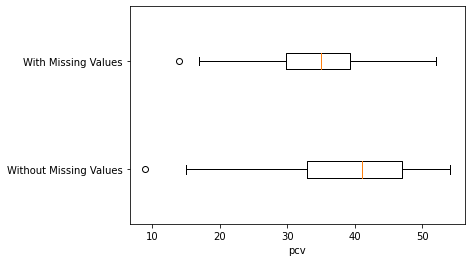

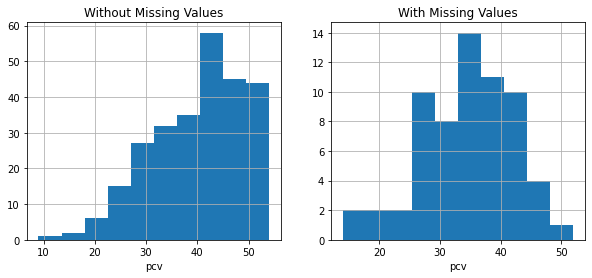

p-value of t-test: 1.552273251165168e-05
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


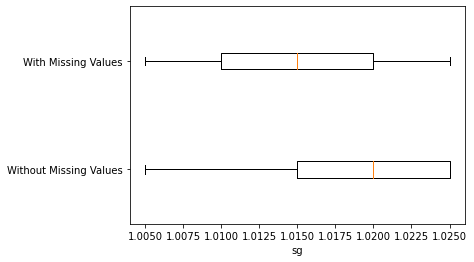

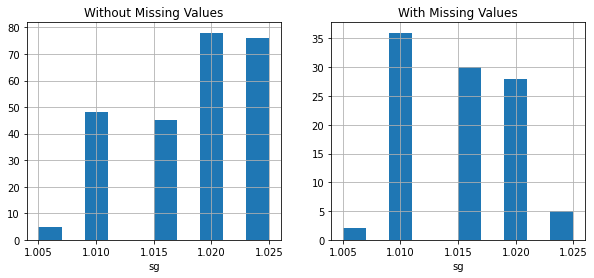

p-value of t-test: 1.0955628827436889e-07
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


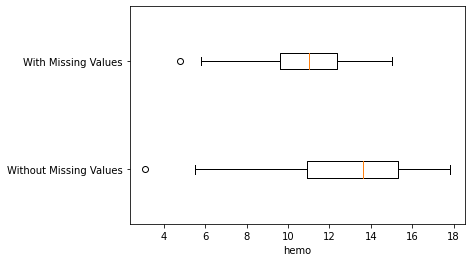

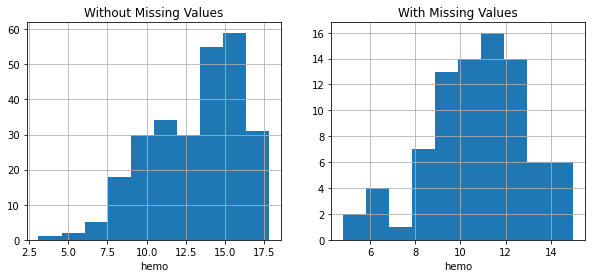

p-value of t-test: 2.976362646602022e-10
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


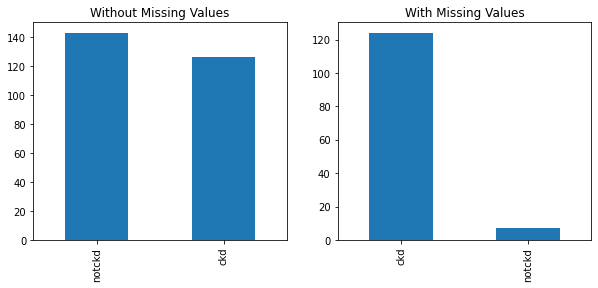

p-value of Chi_squared test: 5.168131718514657e-20
- - - - - - - - - divider - - - - - - - - - 


In [30]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['sc','pcv','sg','hemo']

BM_MV = patient_df.rc.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

Diagnosis Analysis for rc:


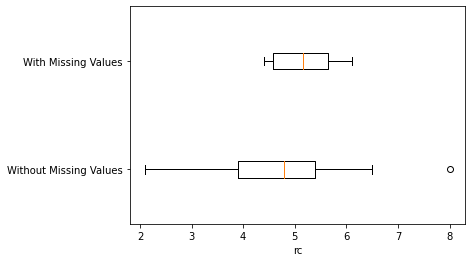

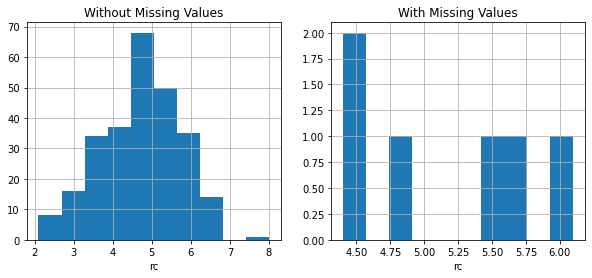

p-value of t-test: 0.2679867109793845
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


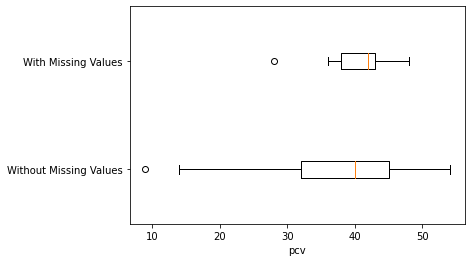

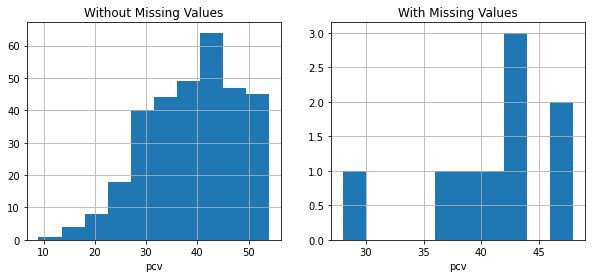

p-value of t-test: 0.5225987625338995
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


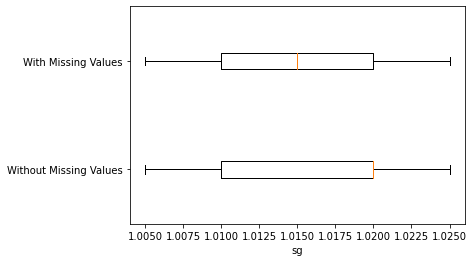

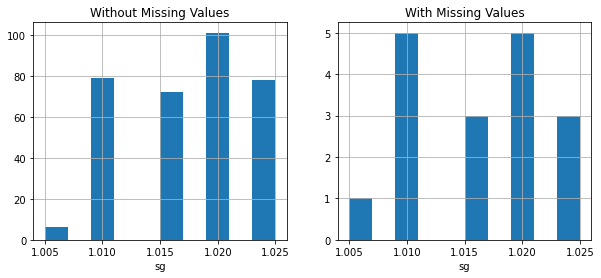

p-value of t-test: 0.363362432134856
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


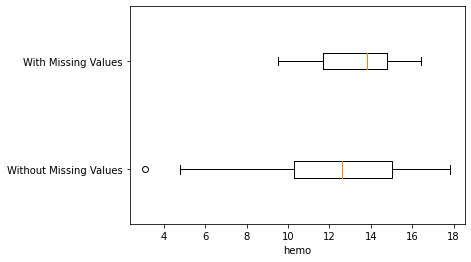

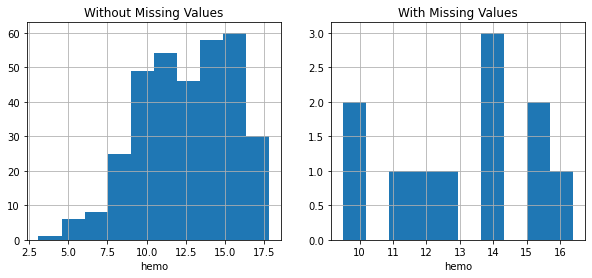

p-value of t-test: 0.4681304996025132
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


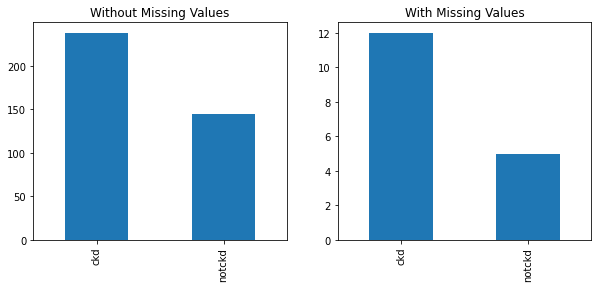

p-value of Chi_squared test: 0.6541676805409404
- - - - - - - - - divider - - - - - - - - - 


In [31]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','pcv','sg','hemo']

BM_MV = patient_df.sc.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

Diagnosis Analysis for rc:


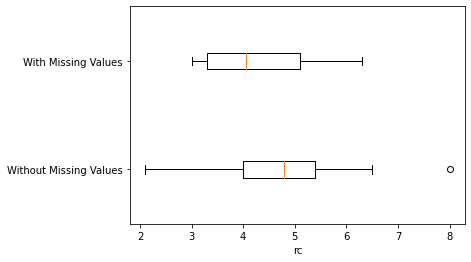

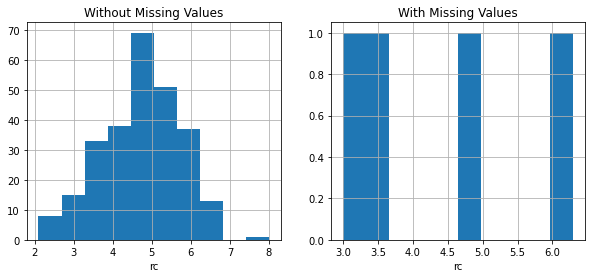

p-value of t-test: 0.48342077054892096
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sc:


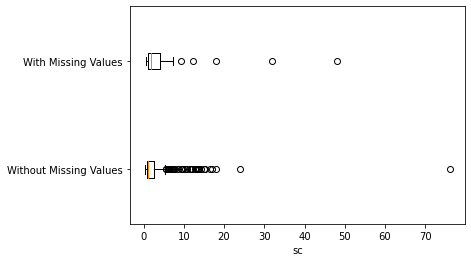

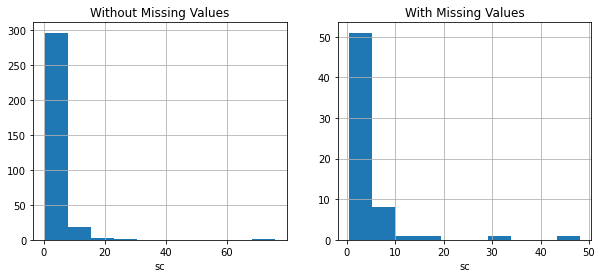

p-value of t-test: 0.0922517821596161
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


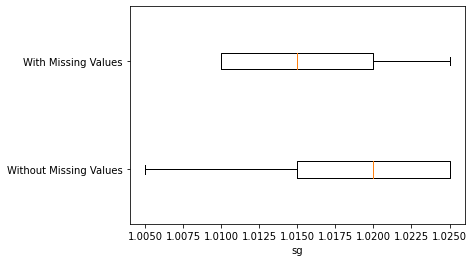

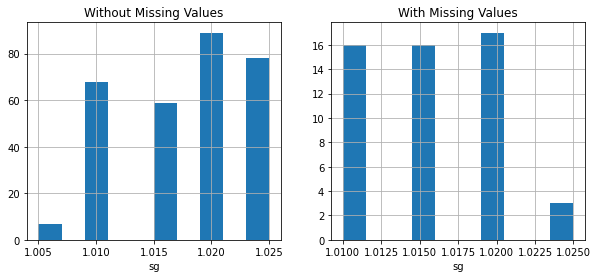

p-value of t-test: 0.01757923566523417
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


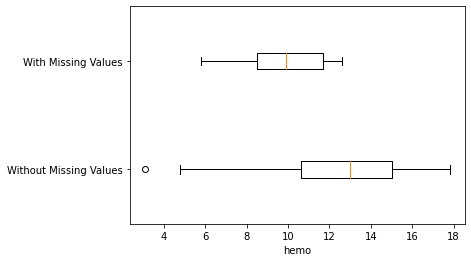

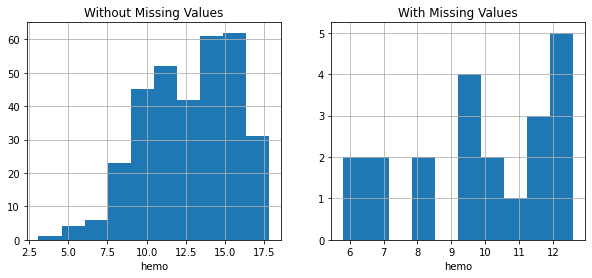

p-value of t-test: 1.5664018538667405e-05
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


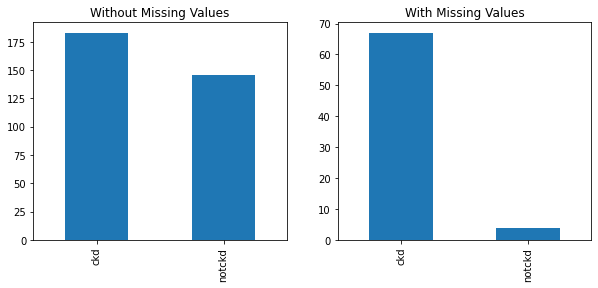

p-value of Chi_squared test: 2.2258514131489864e-09
- - - - - - - - - divider - - - - - - - - - 


In [32]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','sc','sg','hemo']

BM_MV = patient_df.pcv.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

Diagnosis Analysis for rc:


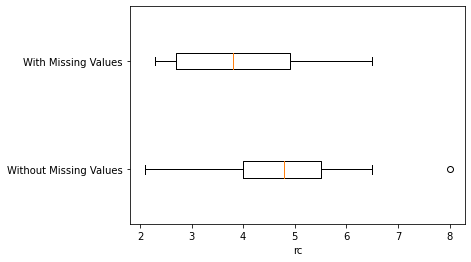

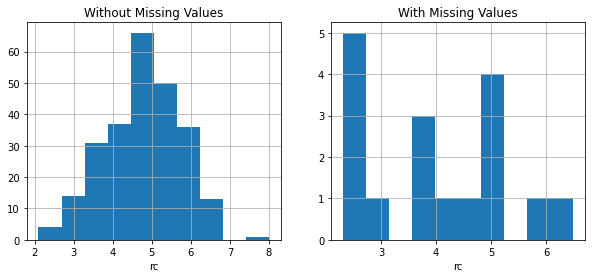

p-value of t-test: 0.00225068644343712
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sc:


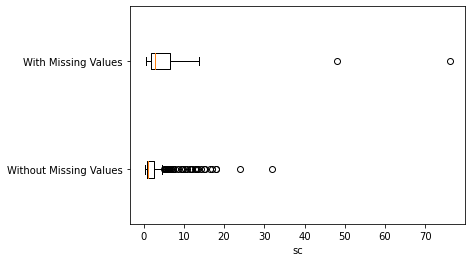

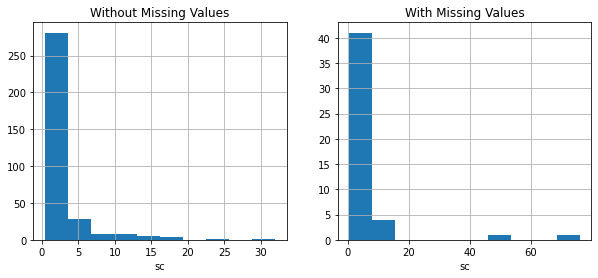

p-value of t-test: 7.153109526995942e-06
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


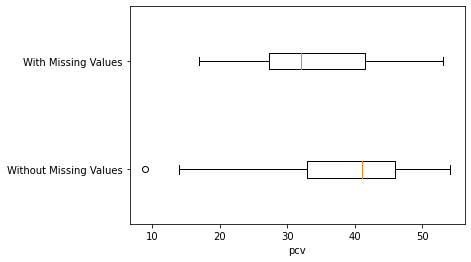

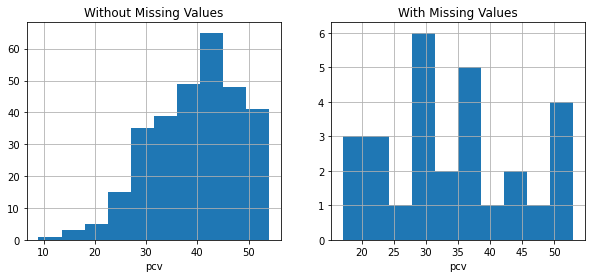

p-value of t-test: 0.0014894695918489607
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for hemo:


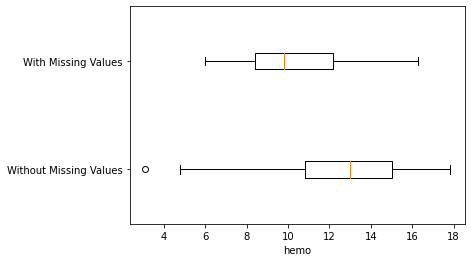

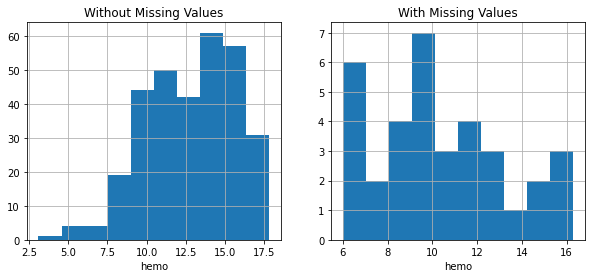

p-value of t-test: 2.7119421233597216e-06
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


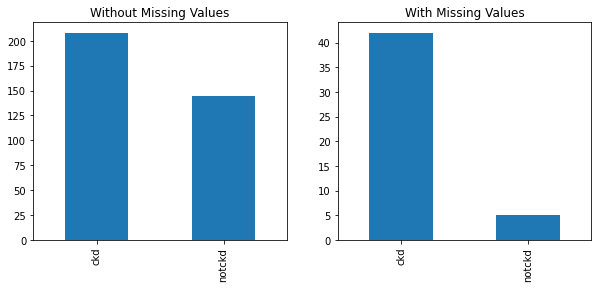

p-value of Chi_squared test: 0.00010072544367170718
- - - - - - - - - divider - - - - - - - - - 


In [33]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','sc','pcv','hemo']

BM_MV = patient_df.sg.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

Diagnosis Analysis for rc:


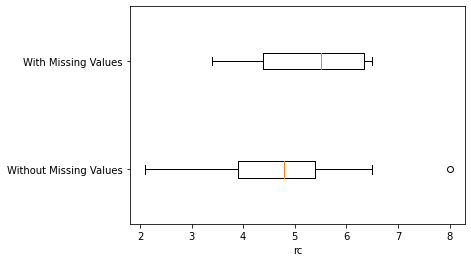

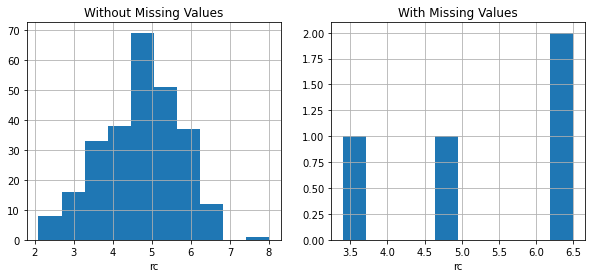

p-value of t-test: 0.30996898190520183
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sc:


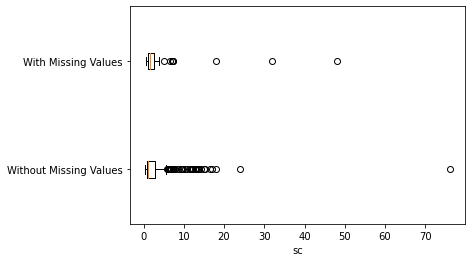

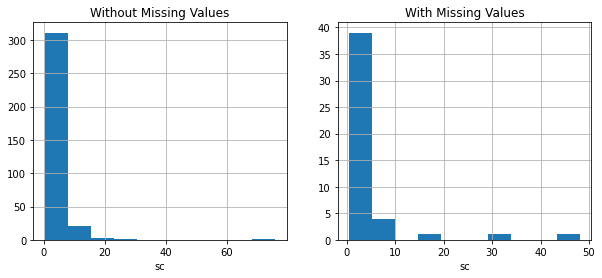

p-value of t-test: 0.17771862389361795
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for pcv:


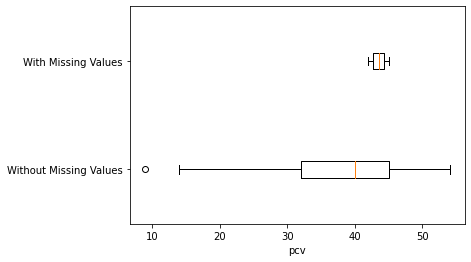

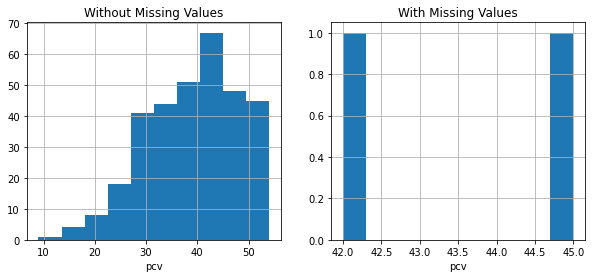

p-value of t-test: 0.46728803939148567
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for sg:


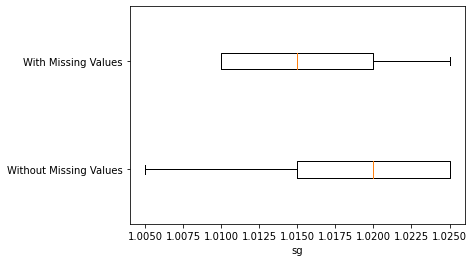

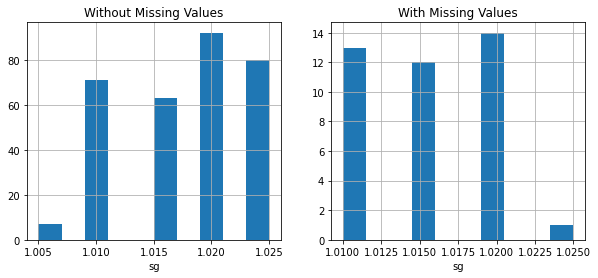

p-value of t-test: 0.016703395424493707
- - - - - - - - - divider - -  - - - - - - 
Diagnosis Analysis for diagnosis:


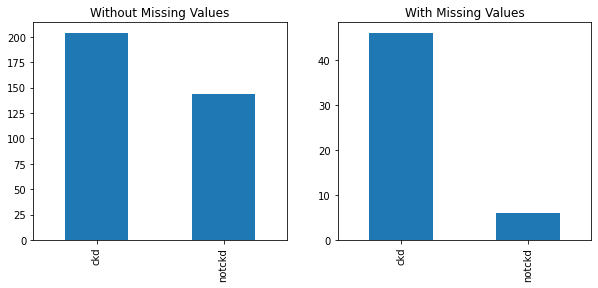

p-value of Chi_squared test: 6.542728784321527e-05
- - - - - - - - - divider - - - - - - - - - 


In [34]:
categorical_attributes = ['diagnosis']
numerical_attributes = ['rc','sc','pcv','sg']

BM_MV = patient_df.hemo.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Numerical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - -  - - - - - - ')
for att in categorical_attributes:
    print('Diagnosis Analysis for {}:'.format(att))
    Diagnose_MV_Categorical(patient_df,att,BM_MV)
    print('- - - - - - - - - divider - - - - - - - - - ')

In [35]:
patient_df['rc_BMV'] = patient_df.rc.isna().astype(int)
patient_df['pcv_BMV'] = patient_df.pcv.isna().astype(int)
patient_df['sg_BMV'] = patient_df.sg.isna().astype(int)
patient_df['hemo_BMV'] = patient_df.hemo.isna().astype(int)

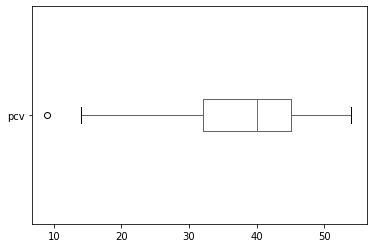

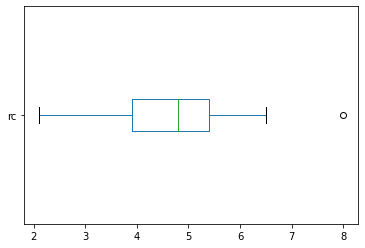

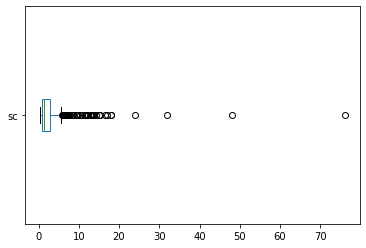

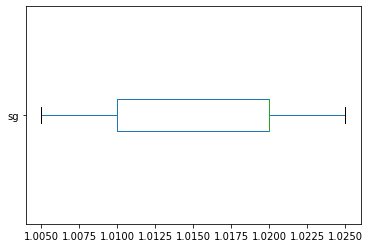

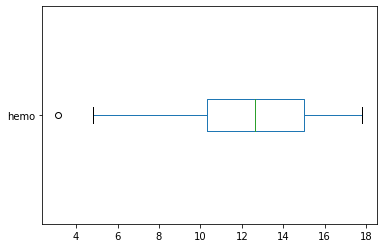

In [36]:
numerical_attributes = ['pcv','rc','sc','sg','hemo']
for att in numerical_attributes:
    patient_df[att].plot.box(vert=False)
    plt.show()

In [37]:
patient_df.sc.fillna(patient_df.sc.median(),inplace=True)
patient_df.fillna(patient_df.mean(),inplace=True)

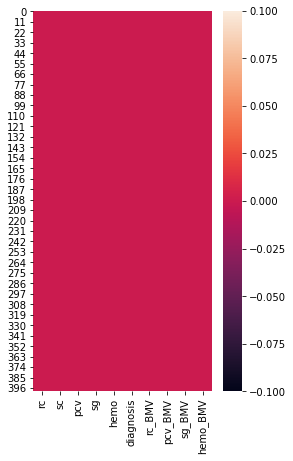

In [38]:
plt.figure(figsize=(4,7))
sns.heatmap(patient_df.isna())
plt.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
predictors = ['rc', 'sc', 'pcv', 'sg', 'hemo', 'rc_BMV', 'pcv_BMV', 'sg_BMV', 'hemo_BMV']
target = 'diagnosis'

Xs = patient_df[predictors]
y= patient_df[target]

classTree = DecisionTreeClassifier(min_impurity_decrease= 0.01, min_samples_split= 15)
classTree.fit(Xs, y)

DecisionTreeClassifier(min_impurity_decrease=0.01, min_samples_split=15)

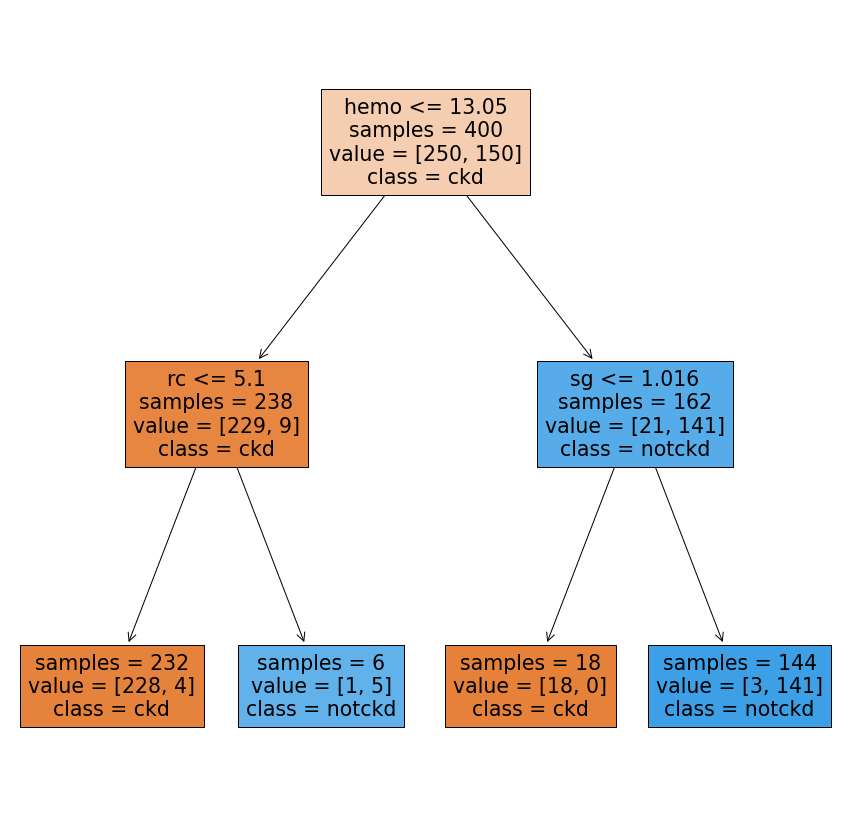

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(classTree, 
          feature_names=predictors,  
          class_names=y.unique(),
          filled=True,
          impurity=False)
plt.show()

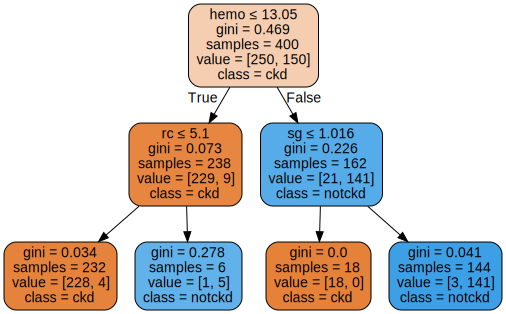

In [41]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(classTree, out_file=None, feature_names=Xs.columns,  
                           class_names=y.unique(), filled=True,
                           rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Outliers 
### Detecting Outliers
#### Univariate Outlier detection

In [42]:
column_df = pd.read_csv('columns.csv')
column_df.head(2)

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs


In [43]:
response_df = pd.read_csv('responses.csv')
response_df.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


#### Example of detecting outliers across one numerical attribute

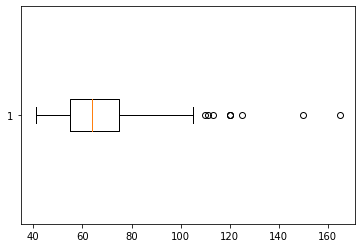

In [44]:
fig = plt.boxplot(response_df.Weight.dropna(),vert=False)

In [46]:
response_df[response_df.Weight>105]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


In [47]:
print(fig)

{'whiskers': [<matplotlib.lines.Line2D object at 0x0000020F9E7773A0>, <matplotlib.lines.Line2D object at 0x0000020F9E296F10>], 'caps': [<matplotlib.lines.Line2D object at 0x0000020F9E296DF0>, <matplotlib.lines.Line2D object at 0x0000020F9E296490>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000020F9E777A90>], 'medians': [<matplotlib.lines.Line2D object at 0x0000020F9E296820>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000020F9E892F40>], 'means': []}


In [48]:
fig['fliers'][0].get_data()

(array([120., 110., 111., 120., 113., 125., 165., 120., 150.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [49]:
Q1 = response_df.Weight.quantile(0.25)
Q3 = response_df.Weight.quantile(0.75)
IQR = Q3-Q1

BM = (response_df.Weight > (Q3+1.5 *IQR)) | (response_df.Weight < (Q1-1.5 *IQR))
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


#### Example of detecting outliers across one categorical attribute

In [50]:
response_df.Education.value_counts()

secondary school                    621
college/bachelor degree             212
masters degree                       81
primary school                       80
currently a primary school pupil     10
doctorate degree                      5
Name: Education, dtype: int64

<AxesSubplot:>

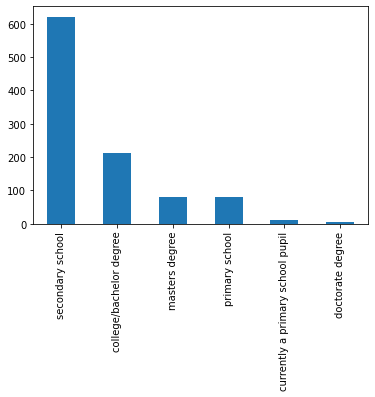

In [51]:
response_df.Education.value_counts().plot.bar()

### Bivariate Outlier detection
#### Example of detecting outliers across two numerical attributes


<AxesSubplot:xlabel='Height', ylabel='Weight'>

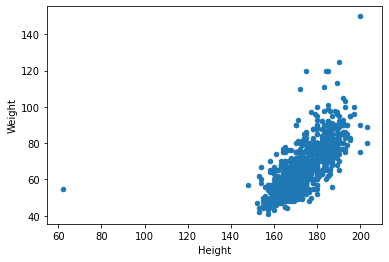

In [52]:
response_df.plot.scatter(x='Height',y='Weight')

In [53]:
BM = (response_df.Weight>130) | (response_df.Height<70)
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,20.0,62.0,55.0,2.0,female,right handed,college/bachelor degree,no,city,house/bungalow
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


#### Example of detecting outliers across two categorical attributes

In [54]:
pd.crosstab(response_df['Education'],response_df['God'])

God,1.0,2.0,3.0,4.0,5.0
Education,,,,,
college/bachelor degree,48,17,46,42,58
currently a primary school pupil,0,1,2,1,6
doctorate degree,1,1,1,0,2
masters degree,8,3,20,15,35
primary school,12,11,21,15,21
secondary school,118,89,126,92,195


<AxesSubplot:xlabel='God', ylabel='Education'>

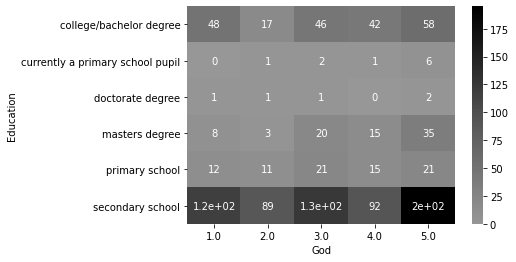

In [55]:
cont_table = pd.crosstab(response_df['Education'],response_df['God'])
sns.heatmap(cont_table,annot=True, center=0.5 ,cmap="Greys")

In [56]:
response_df.query('Education== "currently a primary school pupil" & God==2')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
950,5.0,3.0,2.0,3.0,NaN,4.0,2.0,4.0,5.0,5.0,...,15.0,190.0,85.0,0.0,male,left handed,currently a primary school pupil,yes,village,house/bungalow


In [57]:
response_df.query('Education== "currently a primary school pupil" & God==4')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
158,5.0,3.0,4.0,2.0,1.0,3.0,2.0,5.0,4.0,1.0,...,15.0,160.0,48.0,2.0,female,right handed,currently a primary school pupil,no,village,block of flats


In [58]:
response_df.query('Education== "doctorate degree" & God==1')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
668,5.0,3.0,1.0,2.0,3.0,4.0,2.0,2.0,5.0,5.0,...,27.0,186.0,82.0,1.0,male,left handed,doctorate degree,yes,city,house/bungalow


In [59]:
response_df.query('Education== "doctorate degree" & God==2')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow


In [60]:
response_df.query('Education== "doctorate degree" & God==3')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow


#### Example of detecting outliers across two attributes one categorical and the other numerical

<AxesSubplot:xlabel='Age', ylabel='Education'>

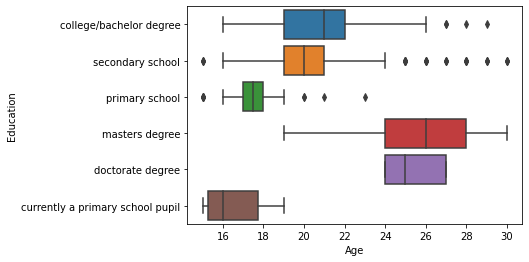

In [61]:
sns.boxplot(x=response_df.Age,y=response_df.Education)

In [62]:
BM1 = (response_df.Education=='college/bachelor degree') & (response_df.Age>26)
BM2 = (response_df.Education == 'secondary school') & ((response_df.Age>24) | (response_df.Age<16))
BM3 = (response_df.Education == 'primary school') & ((response_df.Age>19) | (response_df.Age<16))
BM = BM1 | BM2 | BM3
response_df[BM]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
30,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,2.0,...,25.0,183.0,87.0,1.0,male,right handed,secondary school,no,city,block of flats
40,4.0,3.0,4.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,...,26.0,172.0,62.0,1.0,female,right handed,secondary school,no,city,block of flats
49,5.0,4.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,3.0,...,20.0,157.0,41.0,1.0,female,right handed,primary school,no,city,block of flats
72,5.0,3.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,2.0,...,28.0,168.0,52.0,1.0,female,right handed,secondary school,no,city,block of flats
128,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,...,15.0,173.0,49.0,3.0,female,left handed,primary school,no,city,house/bungalow
132,5.0,4.0,3.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,...,15.0,170.0,51.0,1.0,female,right handed,primary school,no,village,house/bungalow
167,3.0,3.0,3.0,2.0,2.0,NaN,2.0,3.0,4.0,3.0,...,21.0,183.0,98.0,1.0,male,right handed,primary school,no,village,house/bungalow
174,5.0,2.0,1.0,5.0,3.0,3.0,3.0,1.0,1.0,1.0,...,26.0,183.0,78.0,0.0,male,right handed,secondary school,yes,city,house/bungalow
202,5.0,3.0,5.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,...,15.0,181.0,63.0,0.0,male,right handed,primary school,yes,city,block of flats
215,1.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,...,27.0,180.0,80.0,2.0,male,right handed,secondary school,no,city,block of flats


### Multivariate Outlier detection
#### Example of detecting outliers across four attributes using clustering analysis

In [63]:
dimensions = ['Country', 'Metal or Hardrock','Folk','Musical']
Xs = response_df[dimensions]

In [64]:
Xs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1005 non-null   float64
 1   Metal or Hardrock  1007 non-null   float64
 2   Folk               1005 non-null   float64
 3   Musical            1008 non-null   float64
dtypes: float64(4)
memory usage: 31.7 KB


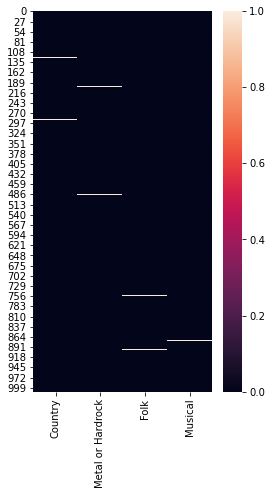

In [65]:
plt.figure(figsize=(4,7))
sns.heatmap(Xs.isna())
plt.show()

In [66]:
Q3 = Xs.quantile(0.75)
Q1 = Xs.quantile(0.25)
IQR = Q3 - Q1
Xs = Xs.fillna(Q3+IQR*1.5)

In [67]:
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())

In [68]:
from sklearn.cluster import KMeans
for k in range(2,8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Xs)
    print('k={}'.format(k))
    for i in range(k):
        BM = kmeans.labels_==i
        print('Cluster {}: {}'.format(i,Xs[BM].index.values))
    print('--------- Divider ----------')

k=2
Cluster 0: [   0    3    4    6    7    9   10   11   13   14   16   17   22   23
   25   27   28   29   30   31   33   34   35   36   38   40   43   44
   45   47   48   50   53   56   57   58   60   61   63   64   67   69
   70   71   72   73   74   76   77   78   79   80   81   87   88   89
   90   92   94   95   97   98   99  102  103  106  110  111  112  113
  114  115  116  117  118  119  121  122  126  129  130  131  132  133
  134  136  137  138  139  140  142  143  144  145  146  148  149  152
  153  155  156  158  162  163  164  165  168  170  171  173  174  179
  183  184  185  186  187  188  191  192  194  195  197  199  202  207
  208  211  212  213  215  217  218  219  220  223  225  228  229  230
  232  237  238  239  240  241  242  243  244  246  247  250  251  252
  253  254  256  259  261  262  263  265  266  268  273  274  278  279
  282  283  284  285  286  287  289  290  292  294  296  297  298  299
  302  304  305  306  308  309  310  311  312  313  315  316  

k=4
Cluster 0: [   2    4    9   13   17   22   23   27   29   30   33   35   36   50
   53   56   57   58   60   67   72   78   79   92  100  102  103  106
  110  111  115  133  134  136  137  138  139  148  149  155  156  162
  174  183  184  186  188  191  197  207  212  213  217  220  225  228
  230  236  242  244  247  251  252  254  256  259  262  263  266  273
  274  278  289  292  302  306  311  318  319  321  323  331  332  333
  334  335  340  342  343  344  348  351  354  358  359  363  378  379
  380  382  387  388  391  396  397  399  403  404  405  406  407  408
  409  411  414  418  419  421  424  428  430  442  447  449  450  453
  458  459  461  464  465  467  468  470  472  478  492  496  497  499
  500  501  503  507  509  514  521  525  530  534  540  546  548  551
  552  553  554  557  561  569  574  575  576  577  578  582  584  591
  592  601  603  615  617  618  619  622  623  625  627  629  633  634
  635  636  637  638  641  642  644  648  654  664  671  672  

k=6
Cluster 0: [   2    5    8   12   15   20   34   39   42   51   55   66   68   83
   84   91  100  120  150  169  172  176  177  182  189  196  204  206
  214  221  224  233  236  257  264  269  270  280  293  322  339  362
  363  370  381  383  399  402  477  479  515  516  517  538  544  546
  547  581  589  590  593  608  631  638  640  663  669  670  678  681
  682  691  692  707  715  718  720  729  730  747  748  751  755  783
  786  796  799  803  804  805  816  821  826  829  834  837  856  858
  864  866  869  871  872  885  892  911  914  915  918  920  931  934
  937  945  964  984  989  994 1005]
Cluster 1: [   0    3    6    7   10   11   14   16   25   28   38   40   43   44
   47   61   63   71   73   76   77   81   88   94   97   98   99  113
  116  117  118  119  126  129  131  132  140  142  143  144  145  153
  158  163  164  165  168  170  171  179  187  192  194  195  199  202
  208  215  219  223  229  232  237  238  239  240  246  250  253  261
  265  268  27

### Time Series Outlier detection

## Dealing with outliers
### First Approach: Do nothing
### Second Approach: Replace with the upper cap or the lower cap
### Third Approach: Perform log transformation 
### Fourth Approach: Remove data objects with outliers	
### Choosing the right approach in dealing with outliers	
### Example 1

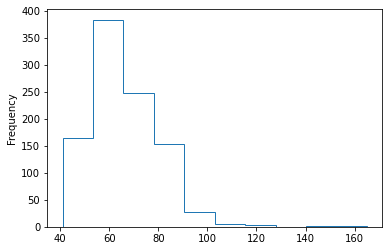

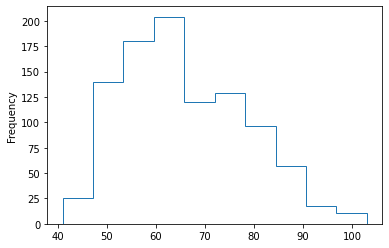

In [69]:
response_df.Weight.plot.hist(histtype='step')
plt.show()
BM = response_df.Weight<105
response_df.Weight[BM].plot.hist(histtype='step')
plt.show()

### Example 2

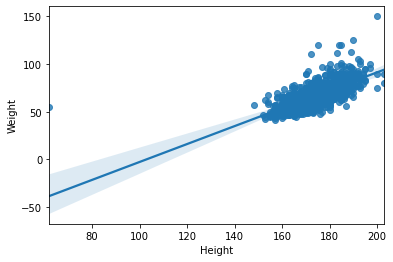

In [70]:
sns.regplot(x='Height',
           y='Weight',data=response_df)
plt.show()

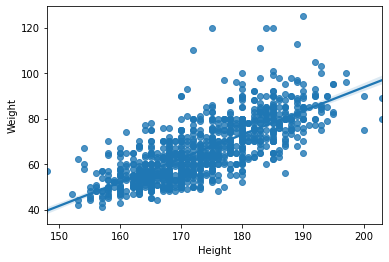

In [71]:
BM = (response_df.Weight>130) | (response_df.Height<70)
sns.regplot(x='Height',
           y='Weight',data=response_df[~BM])
plt.show()

### Example 3

#### Dealing with missing values

In [72]:
select_attributes = ['Weight','Height','Gender']
pre_process_df = pd.DataFrame(response_df[select_attributes])
pre_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  990 non-null    float64
 1   Height  990 non-null    float64
 2   Gender  1004 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.8+ KB


In [73]:
pre_process_df.dropna(inplace=True)

In [74]:
pre_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  975 non-null    float64
 1   Height  975 non-null    float64
 2   Gender  975 non-null    object 
dtypes: float64(2), object(1)
memory usage: 30.5+ KB


#### Detecting univariate outliers and dealing with them

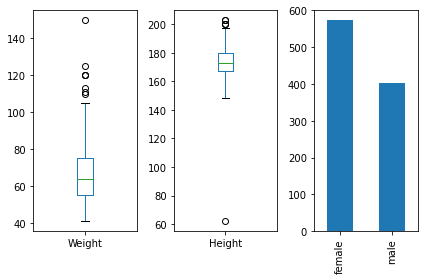

In [75]:
num_attributes = ['Weight','Height']
for i,att in enumerate(num_attributes):
    plt.subplot(1,3,i+1)
    pre_process_df[att].plot.box()

plt.subplot(1,3,3)
pre_process_df.Gender.value_counts().plot.bar()
plt.tight_layout()
plt.show()

In [76]:
Q3 = pre_process_df.Weight.quantile(0.75)
Q1 = pre_process_df.Weight.quantile(0.25)
IQR = Q3 - Q1

upper_cap = Q3+IQR*1.5

BM = pre_process_df.Weight > upper_cap
pre_process_df.loc[pre_process_df[BM].index,'Weight'] = upper_cap

<AxesSubplot:>

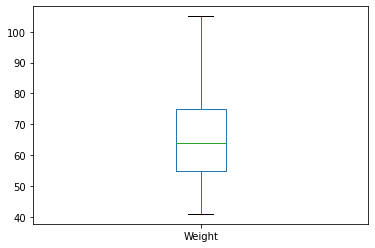

In [77]:
pre_process_df.Weight.plot.box()

In [78]:
Q3 = pre_process_df.Height.quantile(0.75)
Q1 = pre_process_df.Height.quantile(0.25)
IQR = Q3 - Q1

lower_cap = Q1-IQR*1.5
upper_cap = Q3+IQR*1.5

BM = pre_process_df.Height < lower_cap
pre_process_df.loc[pre_process_df[BM].index,'Height'] = lower_cap

BM = pre_process_df.Height > upper_cap
pre_process_df.loc[pre_process_df[BM].index,'Height'] = upper_cap

<AxesSubplot:>

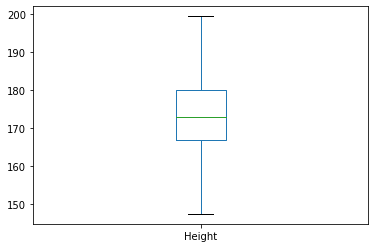

In [79]:
pre_process_df.Height.plot.box()

#### Detecting bivariate outliers and dealing with them

<AxesSubplot:xlabel='Height', ylabel='Weight'>

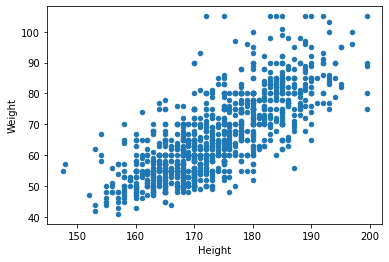

In [80]:
pre_process_df.plot.scatter(x='Height',y='Weight')

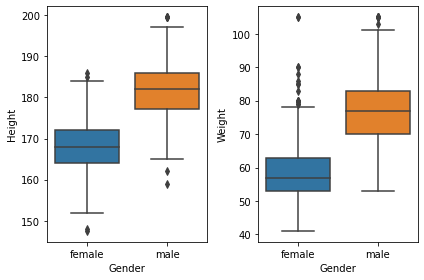

In [81]:
plt.subplot(1,2,1)
sns.boxplot(y=pre_process_df.Height,x=pre_process_df.Gender)
plt.subplot(1,2,2)
sns.boxplot(y=pre_process_df.Weight, x=pre_process_df.Gender)
plt.tight_layout()

In [82]:
for poss in pre_process_df.Gender.unique():
    BM = pre_process_df.Gender == poss
    wdf = pre_process_df[BM]
    Q3 = wdf.Height.quantile(0.75)
    Q1 = wdf.Height.quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5
    
    BM = wdf.Height > upper_cap
    pre_process_df.loc[wdf[BM].index,'Height'] = upper_cap
    
    BM = wdf.Height < lower_cap
    pre_process_df.loc[wdf[BM].index,'Height'] = lower_cap

In [83]:
for poss in pre_process_df.Gender.unique():
    BM = pre_process_df.Gender == poss
    wdf = pre_process_df[BM]
    Q3 = wdf.Weight.quantile(0.75)
    Q1 = wdf.Weight.quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5
    
    BM = wdf.Weight > upper_cap
    pre_process_df.loc[wdf[BM].index,'Weight'] = upper_cap
    
    BM = wdf.Weight < lower_cap
    pre_process_df.loc[wdf[BM].index,'Weight'] = lower_cap

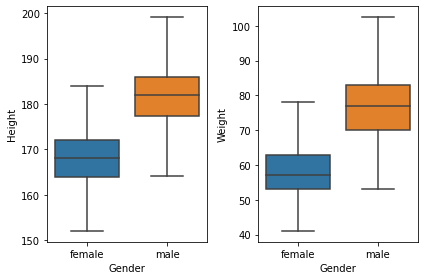

In [84]:
plt.subplot(1,2,1)
sns.boxplot(y=pre_process_df.Height,x=pre_process_df.Gender)
plt.subplot(1,2,2)
sns.boxplot(y=pre_process_df.Weight, x=pre_process_df.Gender)
plt.tight_layout()

#### Detecting multivariate outliers and dealing with them

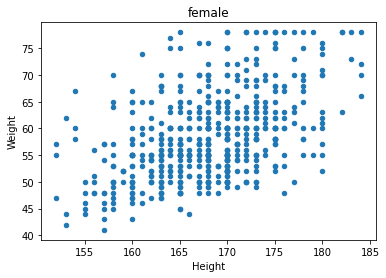

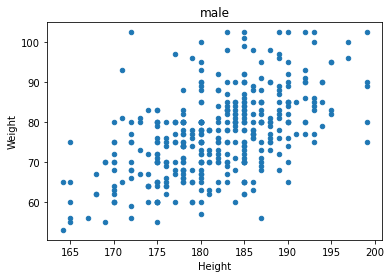

In [85]:
cat_attribute_poss = pre_process_df.Gender.unique()
for i,poss in enumerate(cat_attribute_poss):
    BM = pre_process_df.Gender == poss
    pre_process_df[BM].plot.scatter(x='Height',y='Weight')
    plt.title(poss)
    plt.show()

#### Applying linear regression 

In [86]:
pre_process_df.Gender.replace({'male':0,'female':1},inplace=True)

In [87]:
from sklearn.linear_model import LinearRegression

X = ['Height','Gender']
y = 'Weight'

data_X = pre_process_df[X]
data_y = pre_process_df[y]

lm = LinearRegression()
lm.fit(data_X, data_y)

LinearRegression()

In [88]:
print('intercept (b0) ', lm.intercept_)
coef_names = ['b1','b2']
print(pd.DataFrame({'Predictor': data_X.columns,
                    'coefficient Name':coef_names, 
                    'coefficient Value': lm.coef_}))

intercept (b0)  -51.10382582783839
  Predictor coefficient Name  coefficient Value
0    Height               b1           0.704025
1    Gender               b2          -8.602017


### Example 4

In [89]:
select_attributes = ['Weight','Height','Gender']
pre_process_df = pd.DataFrame(response_df[select_attributes])
pre_process_df.dropna(inplace=True)
pre_process_df.Gender.replace({'male':0,'female':1},inplace=True)

In [90]:
from sklearn.neural_network import MLPRegressor

X = ['Height','Gender']
y = 'Weight'

data_X = pre_process_df[X]
data_y = pre_process_df[y]

mlp = MLPRegressor(hidden_layer_sizes=5, max_iter=3000)
mlp.fit(data_X, data_y)

MLPRegressor(hidden_layer_sizes=5, max_iter=3000)

In [91]:
newData = pd.DataFrame({'Height':189.5,'Gender':0},
                       index=[0])
mlp.predict(newData)

array([79.89579149])

### Example 5

In [92]:
community_df = pd.read_csv('chicago_population.csv')
community_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        77 non-null     object 
 1   population  77 non-null     int64  
 2   income      77 non-null     int64  
 3   latino      77 non-null     float64
 4   black       77 non-null     float64
 5   white       77 non-null     float64
 6   asian       77 non-null     float64
 7   other       77 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 4.9+ KB


#### Detecting univariate outliers and dealing with them

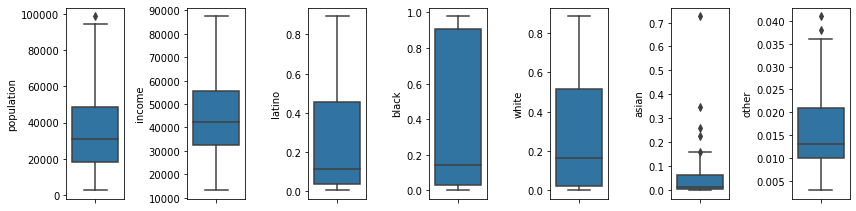

In [93]:
numerical_atts = ['population', 'income', 'latino', 'black', 'white', 'asian','other']
plt.figure(figsize=(12,3))
for i,att in enumerate(numerical_atts):
    plt.subplot(1,len(numerical_atts),i+1)
    sns.boxplot(y=community_df[att])
plt.tight_layout()
plt.show()

In [94]:
pre_process_df = community_df.set_index('name')
candidate_atts = ['population','asian','other']

for att in candidate_atts:
    Q3 = pre_process_df[att].quantile(0.75)
    Q1 = pre_process_df[att].quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5

    BM = pre_process_df[att] < lower_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = lower_cap

    BM = pre_process_df[att] > upper_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = upper_cap

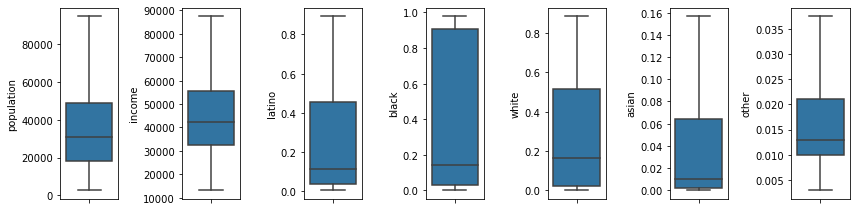

In [95]:
numerical_atts = ['population', 'income', 'latino', 'black', 'white', 'asian','other']
plt.figure(figsize=(12,3))
for i,att in enumerate(numerical_atts):
    plt.subplot(1,len(numerical_atts),i+1)
    sns.boxplot(y=pre_process_df[att])
plt.tight_layout()
plt.show()

#### Detecting bivariate and multivariate outliers and dealing with them
#### Applying K-Means

In [96]:
from sklearn.cluster import KMeans
dimensions = ['population', 'income', 'latino', 'black', 'white', 'asian','other']
Xs = pre_process_df[dimensions]
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())
kmeans = KMeans(n_clusters=5)
kmeans.fit(Xs)

KMeans(n_clusters=5)

In [97]:
for i in range(5):
    BM = kmeans.labels_==i
    print('Cluster {}: {}'.format(i,pre_process_df[BM].index.values))

Cluster 0: ['Austin' 'West Garfield Park' 'East Garfield Park' 'North Lawndale'
 'Douglas' 'Oakland' 'Fuller Park' 'Grand Boulevard' 'Kenwood'
 'Washington Park' 'Woodlawn' 'South Shore' 'Chatham' 'Avalon Park'
 'South Chicago' 'Burnside' 'Calumet Heights' 'Roseland' 'Pullman'
 'South Deering' 'West Pullman' 'Riverdale' 'West Englewood' 'Englewood'
 'Greater Grand Crossing' 'Auburn Gresham' 'Washington Heights'
 'Morgan Park']
Cluster 1: ['Armour Square' 'McKinley Park' 'Bridgeport']
Cluster 2: ['Montclare' 'Belmont Cragin' 'Hermosa' 'Avondale' 'Logan Square'
 'Humboldt Park' 'South Lawndale' 'Lower West Side' 'East Side'
 'Hegewisch' 'Garfield Ridge' 'Archer Heights' 'Brighton Park' 'New City'
 'West Elsdon' 'Gage Park' 'Clearing' 'West Lawn' 'Chicago Lawn' 'Ashburn']
Cluster 3: ['North Center' 'Lake View' 'Lincoln Park' 'Near North Side' 'Edison Park'
 'Norwood Park' 'Jefferson Park' 'Forest Glen' 'Portage Park' 'Dunning'
 'West Town' 'Beverly' 'Mount Greenwood' "O'Hare"]
Cluster 4: 

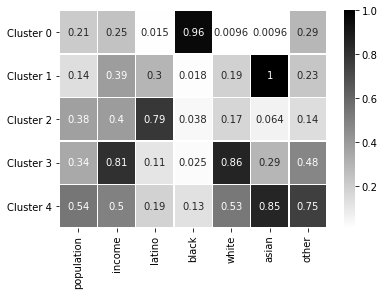

In [98]:
clusters = ['Cluster {}'.format(i) for i in range(5)]

Centroids = pd.DataFrame(0.0, index =  clusters,
                        columns = Xs.columns)
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    Centroids.loc[clst] = Xs[BM].median(axis=0)

sns.heatmap(Centroids, linewidths=.5, annot=True, 
                    cmap='binary')
plt.show()

# Errors
## Types of errors
## Dealing with errors
## Detecting systematic errors
### Example of systematic error and correct outlier

In [99]:
hour_df = pd.read_excel('CustomerEnteries.xlsx')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         495 non-null    datetime64[ns]
 1   Time         495 non-null    int64         
 2   N_Customers  495 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 11.7 KB


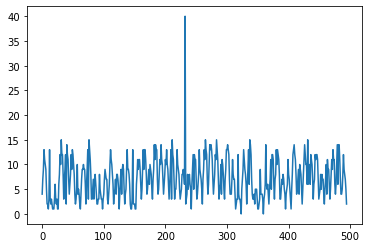

In [100]:
hour_df.N_Customers.plot()
plt.show()

In [101]:
hour_df[hour_df.N_Customers>20]

,Date,Time,N_Customers
232,2020-10-26,16,40


In [102]:
err_index = hour_df[hour_df.N_Customers>20].index
hour_df.at[err_index,'N_Customers']=np.nan

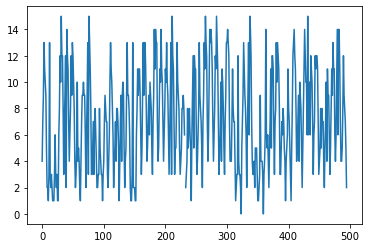

In [103]:
hour_df.N_Customers.plot()
plt.show()

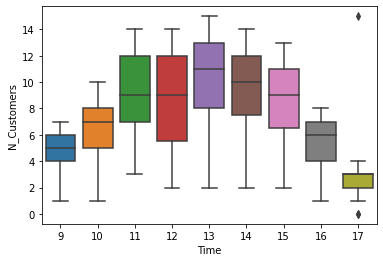

In [104]:
sns.boxplot(y=hour_df.N_Customers,x=hour_df.Time)
plt.show()

In [105]:
hour_df.query("Time==17 and N_Customers>12")

,Date,Time,N_Customers
431,2020-11-17,17,15.0


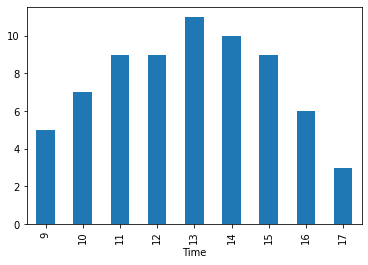

In [106]:
hour_df.groupby('Time').N_Customers.median().plot.bar()
plt.show()

# Summary